In [16]:
import black
import jupyter_black

jupyter_black.load(
    lab=False,
    line_length=79,
    verbosity="DEBUG",
    target_version=black.TargetVersion.PY313,
)


DEBUG:jupyter_black:Using config from C:\Users\haavarug\Documents\VSCode-PhD\chemometrics\pyproject.toml
DEBUG:jupyter_black:config: {'line_length': 79, 'lab': False, 'target_versions': {<TargetVersion.PY313: 13>}}


TypeError: Mode.__init__() got an unexpected keyword argument 'lab'

# Solution to exercise set 3: 


**Learning Objectives:**

After completing this exercise set, you will be able to:

- Calculate effects from full and fractional factorial experimental designs.
- Create and interpret normal probability plots to assess the importance of effects.
- Create least squares models from experimental design results and use them to estimate effects.


**To get the exercise approved, complete the following problems:**

- [3.2(a)](#3.2(a)), [3.2(b)](#3.2(b)), and [3.2(c)](#3.2(c)): To show that you can analyse a full factorial design, including creating the normal probability plot.

- [3.3(b)](#3.3(b)) and [3.3(c)](#3.3(c)): To show that you can calculate effects from a fractional factorial design and create a least squares model.

## Exercise 3.1

> **Note:** This problem is more of an example. The code given here will show you how to create a normal probability plot. Run the code, create the plot and interpret it.


After running a set of experiments, you determine the effects
given in the table below for 4 factors: A, B, C, and D:



| A    | B    | C     | D     | AB  | AC   | AD   | BC    | BD   | CD    | ABC   | ACD   | BCD   | ABCD  | ABD   |
|:-----|:-----|:------|:------|:----|:-----|:-----|:------|:-----|:------|:------|:------|:------|:------|:------|
| -8.0 | 24.0 | -2.25 | -5.50 | 1.0 | 0.75 | 0.00 | -1.25 | 4.50 | -0.25 | -0.75 | -0.25 | -0.75 | -0.25 | 0.50  |



**Task:** Use the example code below to create a normal probability plot. Interpret this plot and decide what the important effects are in this case.

In [44]:
# Example code to create a probability plot.

# We collect the effects from the table above:
import pandas as pd

effects = [
    ("A", -8.00),
    ("B", 24.00),
    ("C", -2.25),
    ("D", -5.50),
    ("AB", 1.00),
    ("AC", 0.75),
    ("AD", 0.00),
    ("BC", -1.25),
    ("BD", 4.50),
    ("CD", -0.25),
    ("ABC", -0.75),
    ("ACD", -0.25),
    ("BCD", -0.75),
    ("ABCD", -0.25),
    ("ABD", 0.50),
]
table1 = pd.DataFrame(effects, columns=["factor", "effect"])

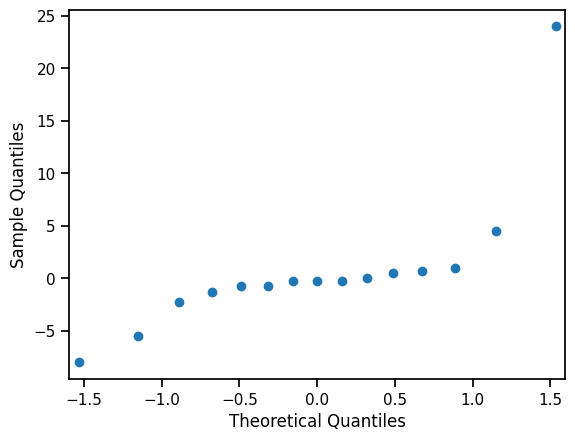

In [45]:
# We create the probability plot using statsmodels:
from matplotlib import pyplot as plt  # Needed for plotting
import seaborn as sns  # Used to style plots for a Jupyter Notebook
import statsmodels.api as sm  # Needed to create the probability plot

sns.set_context("notebook")

# Create the probability plot object using the "effect" column from table1.
# By default, ProbPlot compares the data to a standard normal distribution.
# This can also be selected by setting fit=False.
plot = sm.ProbPlot(table1["effect"], fit=False)

# Create a figure and an axes object. This allows for more control over the plot,
# such as setting axis labels, titles, and so on. fig represents the entire figure,
# while ax represents the specific axes where the plot will be drawn.
fig, ax = plt.subplots()

# Generate the plot and draw it on the specified axes (ax).
_ = plot.qqplot(ax=ax)

The plot above is somewhat hard to read since we do not see the names of the effects.
Let us try to make it easier to read by adding text showing the factor names:

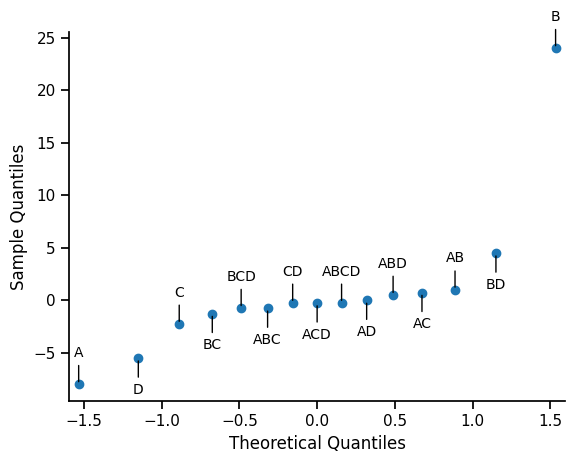

In [46]:
# Create a new figure:
fig, ax = plt.subplots()
plot = sm.ProbPlot(table1["effect"], fit=False)
plot.qqplot(ax=ax)
# Extract the theoretical and sample quantiles from the ProbPlot object.
# These will be used as the x and y coordinates for our scatter plot.
x = (
    plot.theoretical_quantiles
)  # Quantiles of the standard normal distribution.
y = plot.sample_quantiles  # Ordered (sorted) values of the 'effect' column.

# Get the factor names, sorted according to the 'effect' values.  This ensures
# the labels are placed correctly corresponding to the sorted effects on the plot.
sorted_factors = table1.sort_values("effect")

# Add text labels to the plot, one for each data point.
# We iterate through the x (theoretical quantiles), y (sample quantiles), and
# factor names simultaneously using zip().
for i, (xi, yi, factor) in enumerate(zip(x, y, sorted_factors["factor"])):
    # Put the text slightly away from the points. Offset determines
    # how far away the points will be. You can experiment with values
    # different from 3.
    offset = 3 if i % 2 == 0 else -3
    # Use annotate to show the text with a line connecting to the effect:
    ax.annotate(
        factor,  # Use the factor text
        (xi, yi),  # Point we are adding text to
        xytext=(
            xi,
            yi + offset,
        ),  # Shift the text along the y-axis to make it more visible
        ha="center",  # Center the text horizontally on the point
        va="center",  # Center the text vertically on the point
        arrowprops={
            "arrowstyle": "-"
        },  # Add a line connecting the text to the point
        fontsize="small",  # Make the font slightly smaller
    )
sns.despine(fig=fig)

In plots like the one above, data from a normal distribution with a mean of zero and a variance $\sigma^2$ will tend to fall along a straight line passing through the origin, with a slope equal to $\sigma$. It is therefore helpful to add a reference line to the plot to aid in visual assessment.

When checking if numbers are from a standard normal distribution (with $\sigma = 1$), adding the line $x=y$ to the plot is common. This line represents the expected location of points from a standard normal distribution. In the code above this can be achieved by using the `line="45"` option:

```python
plot.qqplot(ax=ax, line="45")
```
In this case, fitting a line through the observed data points can be helpful. A challenge is that potential outliers (which might represent important effects) can influence the fitted line. `statsmodels` offers a robust option based on fitting through quartiles. This can be achieved using the `line="q"` option

```python
plot.qqplot(ax=ax, line="q")
```

In some cases, even `line="q"` might be affected by outliers. A second option is to **use your own judgment to identify the linear region** and potentially fit a line manually, excluding any obvious outliers. This visual inspection might be easier to perform on a plot without added annotations (effect names), as those can sometimes distract from the overall pattern.

#### Your answer to question 3.1: What are the important effects?

The important effects are:
* A
* D
* BD
* B

This is based on manually identifying the linear region in the figure below. C might be a borderline case, but it is close to the linear region identified in the figure.

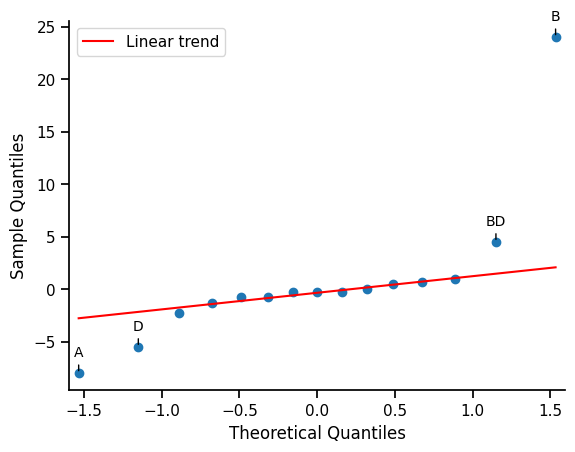

In [47]:
# Create a new figure:
import numpy as np

fig, ax = plt.subplots()
plot = sm.ProbPlot(table1["effect"], fit=False)
plot.qqplot(ax=ax)
x = plot.theoretical_quantiles
y = plot.sample_quantiles

sorted_factors = table1.sort_values("effect")

# Use the 11 smallest points as the linear region:
idx = np.argsort(abs(y))
xin = x[idx[:11]]
yin = y[idx[:11]]
p = np.polyfit(xin, yin, deg=1)
line = np.polyval(p, x)

ax.plot(x, line, label="Linear trend", color="red")

for i, (xi, yi, factor) in enumerate(zip(x, y, sorted_factors["factor"])):
    diff_to_line = yi - np.polyval(p, xi)
    if abs(diff_to_line) < 2:
        continue
    offset = 2
    ax.annotate(
        factor,
        (xi, yi),
        xytext=(xi, yi + offset),
        ha="center",
        va="center",
        arrowprops={"arrowstyle": "-"},
        fontsize="small",
    )
ax.legend(loc="upper left")
sns.despine(fig=fig)

## Exercise 3.2

To optimize the filtration rate of a chemical product manufactured in a pressure
vessel, a 2⁴ factorial experiment was conducted in a pilot plant.
The experiment investigated the effects of temperature (A), pressure (B),
formaldehyde concentration (C), and stirring rate (D), each at two levels.

The goal was to determine how these factors influence filtration rate (volume filtered per unit time), aiming to maximize it for increased throughput and potentially lower costs.

Results from this experimental design can be found below:

In [48]:
import pandas as pd

data32 = {
    "A": [-1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1],
    "B": [-1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1],
    "C": [-1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1],
    "D": [-1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1],
    "Filtration Rate (L/hour)": [
        45,
        71,
        48,
        65,
        68,
        60,
        80,
        65,
        43,
        100,
        45,
        104,
        75,
        86,
        70,
        96,
    ],
}
table32 = pd.DataFrame(data32)
table32

,A,B,C,D,Filtration Rate (L/hour)
0,-1,-1,-1,-1,45
1,1,-1,-1,-1,71
2,-1,1,-1,-1,48
3,1,1,-1,-1,65
4,-1,-1,1,-1,68
5,1,-1,1,-1,60
6,-1,1,1,-1,80
7,1,1,1,-1,65
8,-1,-1,-1,1,43
9,1,-1,-1,1,100


### 3.2(a)

Calculate all main effects and interaction effects (second-, third-, and fourth-order). 

In [49]:
# We first add all the interaction effects to the table:
factors = ["A", "B", "C", "D"]
import itertools

for i in [2, 3, 4]:
    for combination in itertools.combinations(factors, i):
        key = "".join(combination)
        table32[key] = 1
        for factor in combination:
            table32[key] *= table32[factor]

In [50]:
import numpy as np

y = table32["Filtration Rate (L/hour)"].to_numpy()
N = 4  # no. of main factors
table32_effects = {"factor": [], "effect": []}
for key in table32.columns:
    if key != "Filtration Rate (L/hour)":
        values = table32[key].to_numpy()
        contrast = np.dot(values, y)
        effect = contrast / (2 ** (N - 1))
        table32_effects["factor"].append(key)
        table32_effects["effect"].append(effect)

In [51]:
table32_effects = pd.DataFrame(table32_effects)
table32_effects

,factor,effect
0,A,21.625
1,B,3.125
2,C,9.875
3,D,14.625
4,AB,0.125
5,AC,-18.125
6,AD,16.625
7,BC,2.375
8,BD,-0.375
9,CD,-1.125


#### Your answer to question 3.2(a): What are the calculated effects?

Please see the table printed above.

### 3.2(b)
Construct a normal probability plot and use it to identify the important effects.

We try first by adding the `line="q"` option:

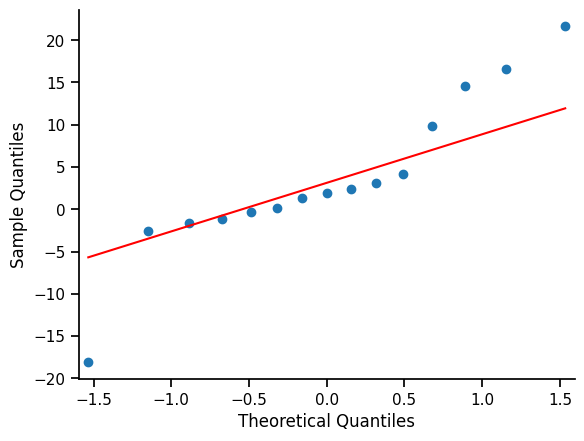

In [52]:
fig, ax = plt.subplots()
plot = sm.ProbPlot(table32_effects["effect"], fit=False)
plot.qqplot(ax=ax, line="q")
sns.despine(fig=fig)

In this case, it seems that we can find another linear region by using the 10 smallest points:

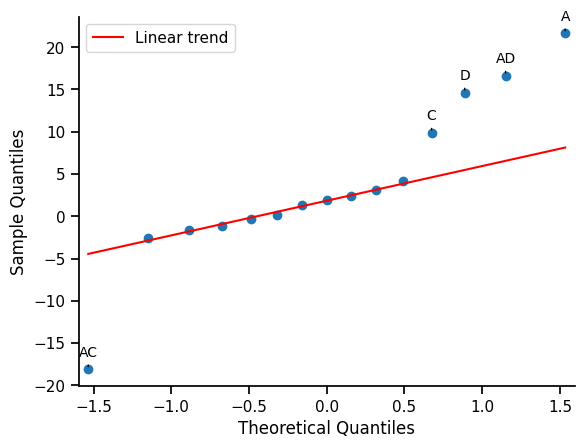

In [53]:
fig, ax = plt.subplots()
plot = sm.ProbPlot(table32_effects["effect"], fit=False)
plot.qqplot(ax=ax)
x = plot.theoretical_quantiles
y = plot.sample_quantiles
# Use the 10 smallest points as the linear region:
idx = np.argsort(abs(y))
xin = x[idx[:10]]
yin = y[idx[:10]]
p = np.polyfit(xin, yin, deg=1)
line = np.polyval(p, x)
ax.plot(x, line, label="Linear trend", color="red")


sorted_factors = table32_effects.sort_values("effect")
for i, (xi, yi, factor) in enumerate(zip(x, y, sorted_factors["factor"])):
    diff_to_line = yi - np.polyval(p, xi)
    if abs(diff_to_line) < 2:
        continue
    offset = 2
    ax.annotate(
        factor,
        (xi, yi),
        xytext=(xi, yi + offset),
        ha="center",
        va="center",
        arrowprops={"arrowstyle": "-"},
        fontsize="small",
    )
ax.legend(loc="upper left")
sns.despine(fig=fig)

sns.despine(fig=fig)

#### Your answer to question 3.2(b): What are important effects?

The important effects are (see the plot above):
* A (temperature)
* C (concentration)
* D (stirring)
* AC (interaction of temperature and concentration)
* AD (interaction of temperature and stirring)

### 3.2(c)
Based on your results, at what level (high or low) should you put each of three factors A, C, and D to maximize the filtration rate?

To answer that, let us first extract the effects:

In [54]:
selected_rows = table32_effects[
    table32_effects["factor"].isin(["A", "AD", "D", "C", "AC"])
]
selected_rows

,factor,effect
0,A,21.625
2,C,9.875
3,D,14.625
5,AC,-18.125
6,AD,16.625


#### Your answer to question 3.2(c): How should you set the factors A, C, and D?

All main effects are positive, suggesting that we should run A (temperature), C (concentration), and D (stirring rate) all at the high setting. However, the interaction between A and C is negative, implying that the positive effect of A is reduced when C is at a high level. Conversely, the positive AD interaction indicates a synergistic effect when both A and D are increased.

While increasing all factors individually seems beneficial, the AC interaction suggests otherwise. A potential strategy could be to maintain C at a low level while increasing both A and D to capitalize on their synergistic effect (motivated by the fact that the effect of C is lower than the other positive effects).

We can check the original experiments, where we find that these settings are indeed giving the highest filtration rates:

|    |   A |   B |   C |   D |   Filtration Rate (L/hour) |
|----|-----|-----|-----|-----|----------------------------|
|  9 |   1 |  -1 |  -1 |   1 |                        100 |
| 11 |   1 |   1 |  -1 |   1 |                        104 |


## Exercise 3.3

Reconsider the experiment described in [Exercise 3.2](#Exercise-3.2). Due to limited resources, we can only do 8 runs. We will therefore use a $2^{4-1}$ fractional factorial design. We select the following generator: $D=ABC$.

### 3.3(a)

Find the defining contrast and resolution of this design.  Are any main effects aliased with two-factor interactions?

#### Your answer to question 3.3(a):

The defining contrast is,

\begin{equation}
\begin{split}
D \times D = D^2 &= ABC \times D \\
1 &= ABCD \\
\end{split}
\end{equation}

This defining contrast is a combination of 4 factors, which means that the resolution is also 4. In this case, a main effect will be aliased with an interaction of order $4 - 1 = 3$. Thus: No main effects are not aliased with two-factor interactions.

### 3.3(b)
The results of a fractional factorial experiment are shown below.
Verify that $D = ABC$ and add columns for the interaction effects $AB$, $AC$, and $BC$ to the table.

In [55]:
import pandas as pd

data33 = {
    "Run": [1, 2, 3, 4, 5, 6, 7, 8],
    "A": [-1, 1, -1, 1, -1, 1, -1, 1],
    "B": [-1, -1, 1, 1, -1, -1, 1, 1],
    "C": [-1, -1, -1, -1, 1, 1, 1, 1],
    "D": [-1, 1, 1, -1, 1, -1, -1, 1],
    "Filtration Rate (L/hour)": [45, 100, 45, 65, 75, 60, 80, 96],
}

table33 = pd.DataFrame(data33)
table33

,Run,A,B,C,D,Filtration Rate (L/hour)
0,1,-1,-1,-1,-1,45
1,2,1,-1,-1,1,100
2,3,-1,1,-1,1,45
3,4,1,1,-1,-1,65
4,5,-1,-1,1,1,75
5,6,1,-1,1,-1,60
6,7,-1,1,1,-1,80
7,8,1,1,1,1,96


In [71]:
table33["AB"] = table33["A"] * table33["B"]
table33["AC"] = table33["A"] * table33["C"]
table33["BC"] = table33["B"] * table33["C"]

In [72]:
D = table33["A"] * table33["B"] * table33["C"]
compare = D == table33["D"]
compare

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
dtype: bool

#### Your answer to question 3.3(b): Is $D=ABC$?

Yes, they are equal.

### 3.3(c)
Calculate all effects ($A$, $B$, $C$, $AB$, $AC$, $BC$, and $D=ABC$). Do this by creating a least squares model, for instance, using [statsmodels](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html) or [scikit-learn](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py).

In [73]:
import statsmodels.api as sm

X = table33[["A", "B", "C", "AB", "AC", "BC", "D"]]
X = sm.add_constant(X)
y = table33["Filtration Rate (L/hour)"]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     Filtration Rate (L/hour)   R-squared:                       1.000
Model:                                  OLS   Adj. R-squared:                    nan
Method:                       Least Squares   F-statistic:                       nan
Date:                      Wed, 19 Mar 2025   Prob (F-statistic):                nan
Time:                              19:14:34   Log-Likelihood:                 239.42
No. Observations:                         8   AIC:                            -462.8
Df Residuals:                             0   BIC:                            -462.2
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

c:\Users\haavarug\Documents\VSCode-PhD\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\haavarug\Documents\VSCode-PhD\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\haavarug\Documents\VSCode-PhD\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\haavarug\Documents\VSCode-PhD\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


To calculate the effects, we use that the regression coefficients are 1/2 of the effect:

In [74]:
table33_effects = {"factor": [], "effect": []}
for factor in results.params.index:
    if factor != "const":
        table33_effects["factor"].append(factor)
        table33_effects["effect"].append(results.params[factor] * 2.0)
table33_effects = pd.DataFrame(table33_effects)
table33_effects

,factor,effect
0,A,19.0
1,B,1.5
2,C,14.0
3,AB,-1.0
4,AC,-18.5
5,BC,19.0
6,D,16.5


#### Your answer to question 3.3(c): What are the effects you calculated?

See the table above.

### 3.3(d)

Identify the unimportant effect(s) based on their calculated values.  Confirm their insignificance by fitting a new least squares model without the unimportant effects. (Removing the unimportant effects should not change $R^2$  significantly.)

In [75]:
X1 = table33[["A", "C", "AC", "BC", "D"]]
X1 = sm.add_constant(X1)
y = table33["Filtration Rate (L/hour)"]
model1 = sm.OLS(y, X1)
results1 = model1.fit()

X2 = table33[["B", "C", "AB", "AC", "BC", "D"]]
X2 = sm.add_constant(X2)
y = table33["Filtration Rate (L/hour)"]
model2 = sm.OLS(y, X2)
results2 = model2.fit()


print(results1.summary())
print(results2.summary())

                               OLS Regression Results                               
Dep. Variable:     Filtration Rate (L/hour)   R-squared:                       0.998
Model:                                  OLS   Adj. R-squared:                  0.993
Method:                       Least Squares   F-statistic:                     188.6
Date:                      Wed, 19 Mar 2025   Prob (F-statistic):            0.00528
Time:                              19:14:36   Log-Likelihood:                -10.521
No. Observations:                         8   AIC:                             33.04
Df Residuals:                             2   BIC:                             33.52
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

c:\Users\haavarug\Documents\VSCode-PhD\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\haavarug\Documents\VSCode-PhD\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


#### Your answer to question 3.3(d): What are the unimportant effects?

Effects B and AB are considerably smaller than the other effects, suggesting they might be negligible. This aligns with the findings from the full design analysis.

Removing these unimportant effects and refitting the model results in a negligible change in $R^2$ (from 1.0 to 0.998). In contrast, removing the important factor A causes a substantial drop in $R^2$ (from 1.0 to 0.765).

## Exercise 3.4

[Teixeira et al. (2018)](https://doi.org/10.1016/j.scitotenv.2018.07.204) investigated the removal of two antibiotics from water using walnut shell-based activated carbon and a Box-Behnken experimental design. Their study examined the effects of pH, temperature (T), and initial antibiotic concentration (C) on antibiotic removal (measured as mg of antibiotic adsorbed per gram of activated carbon).

We will investigate if we can reproduce their results for one of the antibiotics, [Sulfamethoxazole](https://en.wikipedia.org/wiki/Sulfamethoxazole), namely that the optimal conditions for removal of Sulfamethoxazole are obtained at a temperature of 30 °C, initial concentration of 40 mg/L and a pH value of 5.5.

**Task:** Create a linear regression model using the provided experimental data (see [antibiotic.csv](./antibiotic.csv)) to predict the conditions (pH, T, and C) that maximize the removal of Sulfamethoxazole from water. The data includes measurements of Sulfamethoxazole adsorption (mg/g) at various pH (ranging from 2 to 8), temperature (ranging from 10 to 30 °C), and initial concentration (ranging from 20 to 40 mg/L) levels.

The linear model should include all main effects, all second-order main effects, and all interaction effects. That is, your model for the adsorption of the antibiotic ($y$) should be of the form: 

$y = b_0 + \sum_i b_i x_i + \sum_i b_{ii} x_i^2 + \sum_{i <j} b_{ij} x_i x_j$

where $x_i$ represents one of the factors (pH, T, or C).


**Suggested steps:**
1. Load the data using [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).
2. Generate terms needed for the linear model using scikit-learn's [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).
3. Fit the linear regression model using [statsmodels](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html) or [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Evaluate the model's performance by calculating $R²$.
4. Identify the conditions (pH, T, and C) that maximize Sulfamethoxazole removal within the experimental region.  This can be done by using methods from [scipy.optimize](https://docs.scipy.org/doc/scipy/tutorial/optimize.html), for instance [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) (you can maximize $y$ by minimizing $-y$).

In [76]:
# To load the raw data:
import pandas as pd

data = pd.read_csv("antibiotic.csv")

The raw data is provided in the following format:

|    |   pH |   T (°C) |   C (mg/L) |   x1 |   x2 |   x3 |   Sulfamethoxazole (mg/g) |
|---:|-----:|---------:|-----------:|-----:|-----:|-----:|--------------------------:|
|  0 |    2 |       10 |         30 |   -1 |   -1 |    0 |                      57.2 |
|  1 |    2 |       10 |         30 |   -1 |   -1 |    0 |                      54.9 |
|  2 |    2 |       10 |         30 |   -1 |   -1 |    0 |                      54.3 |

Where the columns are:

*   **pH:**  The pH of the solution.
*   **T (°C):** The temperature of the solution in degrees Celsius.
*   **C (mg/L):** The initial concentration of Sulfamethoxazole in mg/L.
*   **x1:** The pH value scaled to the range [-1, 1] using the formula:  `x1 = (pH - 5) / 3`
*   **x2:** The temperature scaled to the range [-1, 1] using the formula: `x2 = (T - 20) / 10`
*   **x3:** The initial concentration scaled to the range [-1, 1] using the formula: `x3 = (C - 30) / 10`
*   **Sulfamethoxazole (mg/g):** The amount of Sulfamethoxazole adsorbed per gram of activated carbon, measured in mg/g.

We begin by developing a method for generating polynomial terms. We use scaled variables to allow direct comparison of the relative importance of the coefficients.

In [77]:
from sklearn.preprocessing import PolynomialFeatures


def make_polynomial(x1, x2, x3, poly, drop=None):
    """Generate polynomial features."""
    _X = pd.DataFrame(
        {
            "x1": x1,
            "x2": x2,
            "x3": x3,
        }
    )
    X_new = pd.DataFrame(
        poly.transform(_X), columns=poly.get_feature_names_out()
    )
    if drop is not None:
        X_new.drop(columns=drop, inplace=True)
    return X_new


# Create the generator for polynomial features:
poly = PolynomialFeatures(
    degree=2,
    include_bias=True,
)
poly.fit(data[["x1", "x2", "x3"]])

y = data["Sulfamethoxazole (mg/g)"]
X = make_polynomial(data["x1"], data["x2"], data["x3"], poly)
X.head()  # This should now contain all the terms we need

,1,x1,x2,x3,x1^2,x1 x2,x1 x3,x2^2,x2 x3,x3^2
0,1.0,-1.0,-1.0,0.0,1.0,1.0,-0.0,1.0,-0.0,0.0
1,1.0,-1.0,-1.0,0.0,1.0,1.0,-0.0,1.0,-0.0,0.0
2,1.0,-1.0,-1.0,0.0,1.0,1.0,-0.0,1.0,-0.0,0.0
3,1.0,-1.0,0.0,-1.0,1.0,-0.0,1.0,0.0,-0.0,1.0
4,1.0,-1.0,0.0,-1.0,1.0,-0.0,1.0,0.0,-0.0,1.0


In [78]:
import statsmodels.api as sm

In [79]:
# Fit the polynomial:
model = sm.OLS(y, X).fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Sulfamethoxazole (mg/g)   R-squared:                       0.917
Model:                                 OLS   Adj. R-squared:                  0.894
Method:                      Least Squares   F-statistic:                     39.32
Date:                     Wed, 19 Mar 2025   Prob (F-statistic):           8.35e-15
Time:                             19:14:41   Log-Likelihood:                -117.36
No. Observations:                       42   AIC:                             254.7
Df Residuals:                           32   BIC:                             272.1
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1 

The initial fit suggests a reasonable model. However, the interaction terms `x1 x2` (pH and temperature) and `x1 x3` (pH and concentration) exhibit high p-values, indicating a lack of statistical significance. We proceed by refitting the model without these two terms.

In [80]:
drop = ["x1 x2", "x1 x3"]

X = make_polynomial(data["x1"], data["x2"], data["x3"], poly, drop=drop)
# Fit the polynomial:
model = sm.OLS(y, X).fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Sulfamethoxazole (mg/g)   R-squared:                       0.914
Model:                                 OLS   Adj. R-squared:                  0.896
Method:                      Least Squares   F-statistic:                     51.42
Date:                     Wed, 19 Mar 2025   Prob (F-statistic):           3.02e-16
Time:                             19:14:42   Log-Likelihood:                -118.20
No. Observations:                       42   AIC:                             252.4
Df Residuals:                           34   BIC:                             266.3
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1 

We now visualize the model to understand its predictions at three different concentrations:

In [81]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_context("notebook")

In [82]:
pH = np.linspace(2, 8, 25)
T = np.linspace(10, 30, len(pH))
conc = np.array([20, 30, 40])


def transform_pH(x):
    """Transform a pH value to the range [-1, 1]"""
    return (x - 5.0) / 3.0


def transform_T(x):
    """Transform a T value to the range [-1, 1]"""
    return (x - 20.0) / 10.0


def transform_C(x):
    """Transform a C value to the range [-1, 1]"""
    return (x - 30.0) / 10.0

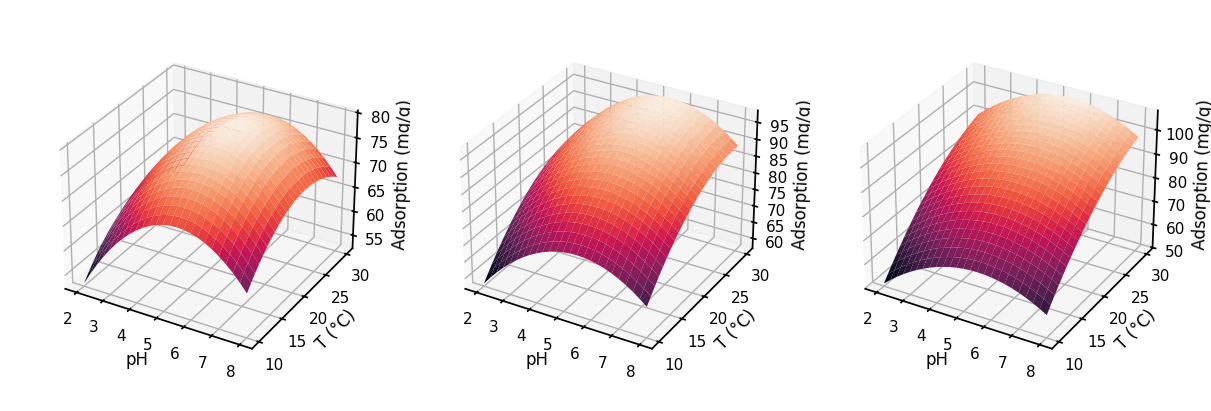

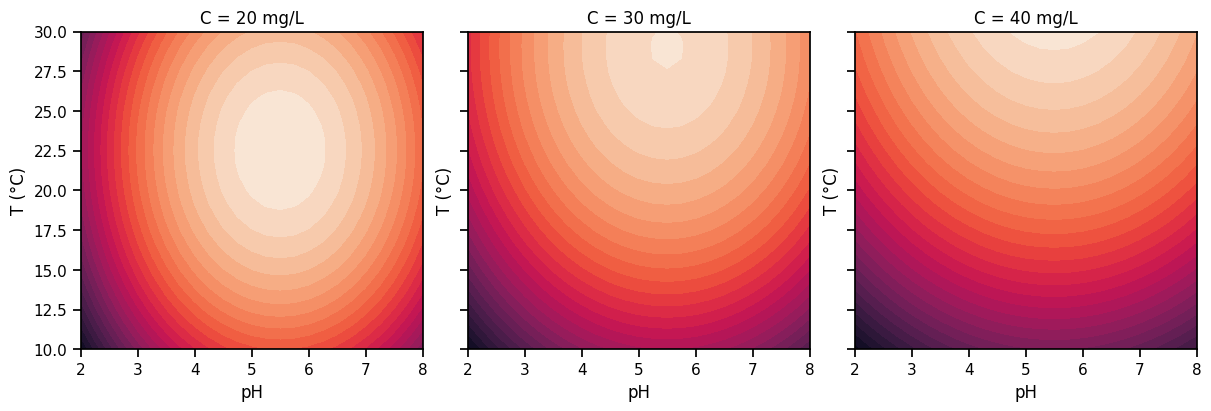

In [83]:
fig, axes = plt.subplots(
    constrained_layout=True,
    figsize=(12, 4),
    ncols=3,
    subplot_kw={"projection": "3d"},
)

fig2, axes2 = plt.subplots(
    constrained_layout=True, figsize=(12, 4), ncols=3, sharex=True, sharey=True
)

for ci, axi, axj in zip(conc, axes, axes2):
    pH_grid, T_grid = np.meshgrid(pH, T)
    conc_grid = np.full_like(pH_grid, ci)

    X_new = make_polynomial(
        transform_pH(pH_grid.ravel()),
        transform_T(T_grid.ravel()),
        transform_C(conc_grid.ravel()),
        poly,
        drop=drop,
    )
    Y = model.predict(X_new.to_numpy()).reshape(pH_grid.shape)
    axi.plot_surface(pH_grid, T_grid, Y, cmap="rocket", linewidth=0)
    axi.set_xlabel("pH")
    axi.set_ylabel("T (°C)")
    axi.set_zlabel("Adsorption (mg/g)")
    axi.set_box_aspect(None, zoom=0.85)
    cont = axj.contourf(pH_grid, T_grid, Y, levels=30, cmap="rocket")
    axj.set(xlabel="pH", ylabel="T (°C)")
    axj.set_title(f"C = {ci} mg/L")

Visual analysis suggests that high temperature and concentration, along with a pH between 5 and 6, lead to maximum absorbance. We now perform a numerical optimization to pinpoint the optimal conditions.

In [84]:
# To find the optimum, it is here maybe easiest to just pick out the largest value from the grid above.
# We can also try to do it numerically. It is then easiest to define a new function:
def evaluate_model(x):
    xx = x.reshape(1, -1)
    X_new = make_polynomial(xx[:, 0], xx[:, 1], xx[:, 2], poly, drop=drop)
    Y = model.predict(X_new)
    return -Y[0]

In [85]:
from scipy.optimize import Bounds, minimize

low = [-1, -1, -1]
high = [1, 1, 1]

bounds = Bounds(low, high)
x0 = np.array([0.0, 1.0, 1.0])  # Initial guess
res = minimize(
    evaluate_model,
    x0,
    method="trust-constr",
    options={"verbose": 1},
    bounds=bounds,
)
y_max = -evaluate_model(res.x)


pH_opt = 5.0 + res.x[0] * 3.0
T_opt = 20.0 + res.x[1] * 10.0
C_opt = 30.0 + res.x[2] * 10.0

print(
    f"Optimum at pH = {pH_opt:3.2f}, T = {T_opt:4.2f} °C, C = {C_opt:4.2f} mg/L, y = {y_max:4.2f}"
)

`gtol` termination condition is satisfied.
Number of iterations: 25, function evaluations: 68, CG iterations: 27, optimality: 5.48e-09, constraint violation: 0.00e+00, execution time: 0.11 s.
Optimum at pH = 5.50, T = 30.00 °C, C = 40.00 mg/L, y = 106.87


This is consistent with the original paper, which states:

> The best conditions, predicted by the model, for the removal of the antibiotic Sulfamethoxazole (106.9 mg/g) are obtained at a temperature of 30 °C, initial concentration of 40 mg/L and a pH value of 5.5. 

#### Your answer to question 3.4: What settings gives you optimum absorbance?

The optimum is at:
* pH = 5.50,
* T = 30 °C,
* Concentraion = 40 mg/L.